In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import tensorflow as tf

In [2]:
IMAGE_WIDTH = 28
IMAGE_HEIGHT = 28
IMAGE_CHANNELS = 1

IMAGE_DIRECTORY = "Presentation_Data/set4/dataset"
CLASS_NAMES = ['lower_0', 'lower_1', 'lower_2', 'lower_3', 'lower_4',
'lower_5', 'lower_6', 'lower_7', 'lower_8', 'lower_9', 'lower_a',
'lower_b', 'lower_d', 'lower_e', 'lower_f', 'lower_g', 'lower_h',
'lower_n', 'lower_q', 'lower_r', 'lower_t', 'upper_A', 'upper_B',
'upper_C', 'upper_D', 'upper_E', 'upper_F', 'upper_G', 'upper_H',
'upper_I', 'upper_J', 'upper_K', 'upper_L', 'upper_M', 'upper_N',
'upper_O', 'upper_P', 'upper_Q', 'upper_R', 'upper_S', 'upper_T',
'upper_U', 'upper_V', 'upper_W', 'upper_X', 'upper_Y', 'upper_Z']

load_me = tf.keras.preprocessing.image_dataset_from_directory(
    IMAGE_DIRECTORY,
    labels="inferred",
    label_mode="categorical",   # one-hot encoding stuff
    image_size=(28, 28),
    color_mode="grayscale",
    shuffle=False,              # These are testing images, shuffling only complicates things
    class_names=CLASS_NAMES,    # Make sure that even if some labels aren't included they still match
    batch_size=1,               # These are testing images, don't care about batches
)

# Normalize them before anything else happens
def normalize(image, label):
	image = tf.cast(image, tf.float32) / 255.0
	return image, label

dataset = load_me.map(normalize)

Found 14100 files belonging to 47 classes.


I0000 00:00:1732292152.257722     908 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1732292154.456889     908 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1732292154.456966     908 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1732292154.461749     908 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1732292154.461831     908 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:0

In [3]:
# Now load in the model
MODEL_FILE = "Testing/model_results/model_v9_correct_batch_normal.keras"
model = tf.keras.models.load_model(MODEL_FILE)

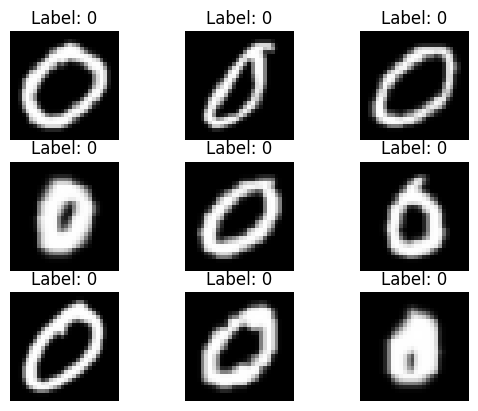

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Draw out some images

for index, (image, label) in enumerate(dataset.take(9)):
    plt.subplot(331 + index)
    plt.imshow(image[0], cmap=plt.get_cmap("gray"))
    true_label = np.argmax(label[0])
    plt.title(f"Label: {true_label}")
    plt.axis('off')
plt.show()

In [5]:
# Make predictions
predictions = model.predict(dataset)
predicted_classes = [CLASS_NAMES[np.argmax(label)] for label in predictions]

I0000 00:00:1732292160.080521    1035 service.cc:146] XLA service 0x7f64080071f0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1732292160.080566    1035 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6


  108/14100 ━━━━━━━━━━━━━━━━━━━━ 19s 1ms/step  

I0000 00:00:1732292162.860419    1035 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


14100/14100 ━━━━━━━━━━━━━━━━━━━━ 23s 1ms/step


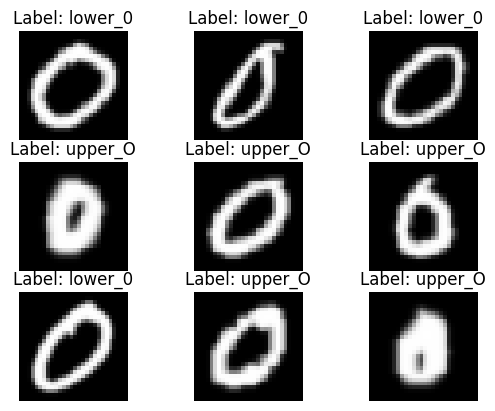

In [6]:
for index, (image, label) in enumerate(dataset.take(9)):
    plt.subplot(331 + index)
    plt.imshow(image[0], cmap=plt.get_cmap("gray"))
    guessed_label = predicted_classes[index]
    plt.title(f"Label: {guessed_label}")
    plt.axis('off')
plt.show()

In [7]:
results = model.evaluate(dataset)
print("Loss and Metrics:", results)

14100/14100 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - accuracy: 0.8808 - loss: 0.3199
Loss and Metrics: [0.3129056990146637, 0.8824822902679443]
